<a href="https://colab.research.google.com/github/injoon-pij/pytorch-learning/blob/master/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Simple Linear Regression by pytorch

## 1.1 기본 setting

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 실습이 반복되어도 같은 결과를 얻기 위해 random seed 지정

torch.manual_seed(1)

## 1.2 변수 선언

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)
print()
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


## 1.3 가중치와 편향 초기화

In [ ]:
# 가중치를 0으로 초기화
# requires_grad = True : 학습을 통해 변경되는 변수임을 나타냄. 그리고 이때 변경되는 텐서에 대한 기울기는 누적됨

W = torch.zeros(1, requires_grad=True) 
print(W)

b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


## 1.4 가설 세우기

$$H(x)= Wx+b$$

In [ ]:
# 직선 방정식에 해당되는 가설 수립

hyp = x_train * W + b
print(hyp)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## 1.5 비용 함수 선언하기

$$cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$$

In [ ]:
cost = torch.mean((hyp - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


## 1.6 경사 하강법 구현하기

In [ ]:
optimizer = optim.SGD([W, b], lr = 0.01)

# W와 b의 gradient를 0으로 초기화
optimizer.zero_grad()

# cost function을 미분하여 W와 b의 gradient 계산
cost.backward()

# 계산된 gradient로 SGD를 통해 W와 b 값 업데이트
optimizer.step()

* optimizer.zero_grad() : 파이토치는 미분을 통해 얻은 기울기를 누적하여 저장함. 따라서 W.grad와 b.grad에 이전 비용함수를 통해 구한 미분값이 남아있으면, 현재 비용함수를 통해 구해진 미분값에 이전값이 누적된 미분값으로 변수가 잘못 갱신됨 

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0


## 1.7 전체 코드

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

#
nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선(W, b)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

# 2) Multivariate Linear Regression by pytorch

## 2.1 기본 setting

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

multivariate linear regression에서는 변수가 많으므로 simple linear regression에서처럼 변수를 하나하나의 값으로 선언하여 계산하면 연산이 비효율적. 따라서 데이터와 가중치, 편향을 행렬로 선언하여 연산을 **행렬 연산**으로 하는 것이 효율적.

$$\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right)
 \ =
\left(
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3} + b\ \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3} + b\ \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3} + b\ \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3} + b\ \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3} + b\ \\
    \end{array}
  \right)$$

In [ ]:
# 훈련 데이터

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

## 2.2 가중치와 편향 초기화

In [ ]:
# 가중치 w와 편향 b 초기화

W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True) # broadcasting

## 2.3 경사 하강법 구현

In [ ]:
# optimizer 설정

optimizer = optim.SGD([W, b], lr = 1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  hyp = x_train.matmul(W) + b

  # cost function 계산
  cost = torch.mean((hyp - y_train) ** 2)

  # 계산된 cost로 가중치와 편향 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} hyp: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hyp.squeeze().detach(), cost.item()
    ))

Epoch    0/2000 hyp: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/2000 hyp: tensor([154.0433, 185.0925, 175.8312, 198.5701, 141.2221]) Cost: 5.754573
Epoch  200/2000 hyp: tensor([154.0278, 185.0649, 175.9335, 198.5128, 141.2284]) Cost: 5.512386
Epoch  300/2000 hyp: tensor([154.0120, 185.0385, 176.0329, 198.4569, 141.2353]) Cost: 5.281667
Epoch  400/2000 hyp: tensor([153.9960, 185.0133, 176.1295, 198.4022, 141.2426]) Cost: 5.061907
Epoch  500/2000 hyp: tensor([153.9797, 184.9892, 176.2233, 198.3488, 141.2504]) Cost: 4.852424
Epoch  600/2000 hyp: tensor([153.9632, 184.9662, 176.3143, 198.2966, 141.2586]) Cost: 4.652731
Epoch  700/2000 hyp: tensor([153.9465, 184.9442, 176.4029, 198.2456, 141.2672]) Cost: 4.462265
Epoch  800/2000 hyp: tensor([153.9296, 184.9232, 176.4888, 198.1958, 141.2762]) Cost: 4.280604
Epoch  900/2000 hyp: tensor([153.9126, 184.9032, 176.5724, 198.1471, 141.2855]) Cost: 4.107261
Epoch 1000/2000 hyp: tensor([153.8955, 184.8841, 176.6536, 198.0995, 141.295

\+ 추가

```python
hyp

>>> tensor([[153.7204],
        [184.7364],
        [177.3512],
        [197.6782],
        [141.4043]], grad_fn=<AddBackward0>)

# 1인 차원 제거
hyp.squeeze()

>>> tensor([153.7204, 184.7364, 177.3512, 197.6782, 141.4043],
       grad_fn=<SqueezeBackward0>)

# tensor value만 추출
hyp.squeeze().detach() # tensor 크기가 1일 때는 .item()

>>> tensor([153.7204, 184.7364, 177.3512, 197.6782, 141.4043])

```



# 3) Linear Regression by pytorch nn.Module

cost function을 직접 정의해서 linear regression model을 구현하는 것이 아닌, pytorch에 이미 구현되어 제공되어 있는 함수들로 linear regression model을 구현 



```
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)

import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)
```



## 3.1 Simple Linear Regression

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# model : 단순선형회귀모델이므로 input_dim=1, output_dim=1
model = nn.Linear(1,1)

# model는 랜덤으로 초기화된 weight와 bias를 parameter로 가짐
# 두 값 모두 학습 대상이므로 requires_grad=True
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [ ]:
# optimizer setting
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# SGD
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # forward 연산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # 계산된 cost로 optimizer을 활용하여 W,b 업데이트 
    
    # gradient를 0으로 초기화
    optimizer.zero_grad()

    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산

    # 계산된 gradient로 W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
# test
new_var = torch.FloatTensor([[4.0]])
pred_y = model(new_var) # forward 연산

print(pred_y) # model 훈련 뒤 새로운 데이터에 대한 예측값
print(list(model.parameters())) # W, b

tensor([[7.9989]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


**요약**

* 입력값 $x$로부터 예측값 $y$를 얻는 것을 forward 연산
 * ```python
   prediction = model(x_train)
   ```
 * ```python
   pred_y = model(new_var)
   ```
* 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산
 * ```python
   cost.backward()
   ```

## 3.2 Multivaraite Linear Regression

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# data
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# # model : 다중선형회귀모델이므로 input_dim=3, output_dim=1
model = nn.Linear(3,1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True),
 Parameter containing:
 tensor([0.2710], requires_grad=True)]

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # forward
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일

    # cost
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward() # backward
    # update W,b
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223910
Epoch  300/2000 Cost: 0.221930
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214955
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211949
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209237
Epoch 1200/2000 Cost: 0.207971
Epoch 1300/2000 Cost: 0.206764
Epoch 1400/2000 Cost: 0.205616
Epoch 1500/2000 Cost: 0.204527
Epoch 1600/2000 Cost: 0.203479
Epoch 1700/2000 Cost: 0.202487
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200638
Epoch 2000/2000 Cost: 0.199769


In [ ]:
# test
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 
print(pred_y)
print(list(model.parameters()))

tensor([[151.2305]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


# 4) Modeling Linear Regression by Class

모델을 클래스로 구현하는 것 외의 과정은 앞선 코드와 모두 동일함

```python
# Class 선언을 통해 사용하고자 하는 neural network 직접 구현

class my_network(nn.Module):
  def __init__(self):

    super(my_network, self).__init__() 
    # 또는 super().__init__()

    self.my_func = (사용할 함수)
    # 사용할 함수들을 정의할 장소를 지정

  def forward(self, x): # 변수 개수는 임의로 조정가능
    # 함수들을 사용하여 network의 forward를 정의하는 장소
    return (network의 forward를 모두 통과한 결과값)
```



In [ ]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([[0.8742]], requires_grad=True), Parameter containing:
 tensor([0.3112], requires_grad=True)]

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = MultivariateLinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.2150, -0.3487, -0.0968]], requires_grad=True),
 Parameter containing:
 tensor([-0.2490], requires_grad=True)]

# 5) Mini batch and Data Load

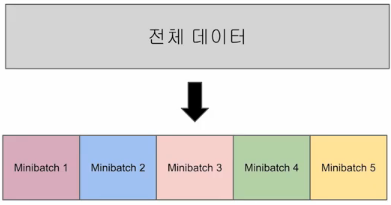

미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행합니다. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복합니다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 됩니다.

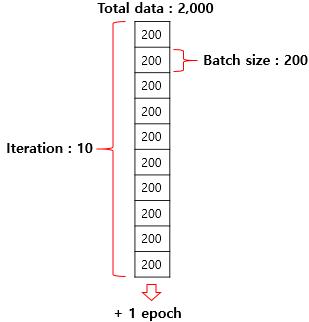

* iteration 수 = 매개변수가 업데이트되는 횟수 

## 5.1 Dataset & DataLoader

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 입력된 텐서를 Dataset 형태로 변환
from torch.utils.data import DataLoader

In [30]:
# Dataset 만들기

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)
list(dataset)

[(tensor([73., 80., 75.]), tensor([152.])),
 (tensor([93., 88., 93.]), tensor([185.])),
 (tensor([89., 91., 90.]), tensor([180.])),
 (tensor([ 96.,  98., 100.]), tensor([196.])),
 (tensor([73., 66., 70.]), tensor([142.]))]

In [31]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [32]:
print(list(dataloader)[0])
print(list(dataloader)[1])
print(list(dataloader)[2])

[tensor([[89., 91., 90.],
        [73., 66., 70.]]), tensor([[180.],
        [142.]])]
[tensor([[73., 80., 75.],
        [93., 88., 93.]]), tensor([[152.],
        [185.]])]
[tensor([[73., 66., 70.]]), tensor([[142.]])]


In [54]:
# modeling

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

# train

nb_epochs = 30
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    #print(batch_idx)
    #print(samples)

    # dataloader을 통해 shuffle된 dataset을 미니배치로 순서대로 sampling
    x_train, y_train = samples
    # forward
    prediction = model(x_train)

    # cost function
    cost = F.mse_loss(prediction, y_train)

    # backward & update 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/30 Batch 1/3 Cost: 50970.523438
Epoch    0/30 Batch 2/3 Cost: 15343.379883
Epoch    0/30 Batch 3/3 Cost: 8575.118164
Epoch    1/30 Batch 1/3 Cost: 1159.425171
Epoch    1/30 Batch 2/3 Cost: 381.801697
Epoch    1/30 Batch 3/3 Cost: 119.684319
Epoch    2/30 Batch 1/3 Cost: 34.586109
Epoch    2/30 Batch 2/3 Cost: 12.147625
Epoch    2/30 Batch 3/3 Cost: 4.660673
Epoch    3/30 Batch 1/3 Cost: 1.913091
Epoch    3/30 Batch 2/3 Cost: 0.078794
Epoch    3/30 Batch 3/3 Cost: 0.120049
Epoch    4/30 Batch 1/3 Cost: 0.163583
Epoch    4/30 Batch 2/3 Cost: 0.180801
Epoch    4/30 Batch 3/3 Cost: 0.526342
Epoch    5/30 Batch 1/3 Cost: 0.095182
Epoch    5/30 Batch 2/3 Cost: 0.557623
Epoch    5/30 Batch 3/3 Cost: 0.000521
Epoch    6/30 Batch 1/3 Cost: 0.153809
Epoch    6/30 Batch 2/3 Cost: 0.324544
Epoch    6/30 Batch 3/3 Cost: 0.004249
Epoch    7/30 Batch 1/3 Cost: 0.000819
Epoch    7/30 Batch 2/3 Cost: 0.258905
Epoch    7/30 Batch 3/3 Cost: 0.420630
Epoch    8/30 Batch 1/3 Cost: 0.123559
Epoch

In [55]:
# test

new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var)
print(pred_y)

tensor([[151.3637]], grad_fn=<AddmmBackward>)


## 5.2 Custom Dataset

torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만들 수 있다. 이는 pytorch의 Dataset class를 상속받아 몇가지 기본적인 define을 오버라이드하여 커스텀 데이터셋을 만든다.

```python
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
  # len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len

  def __getitem__(self, idx): 
  데이터셋에서 특정 1개의 샘플을 가져오는 함수
  # dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item
```

In [57]:
# 5.1 multivariate linear regression dataset 예제

# Dataset 상속

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [60]:
dataset = CustomDataset()

print(len(dataset))
print(dataset[0])

# dataloader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

5
(tensor([73., 80., 75.]), tensor([152.]))
